In [3]:
# from converter import Converter
import moviepy.editor as mp
import pydub
import numpy as np
import scipy.io.wavfile as wav
import scipy

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_file(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2 ** 15
    else:
        return a.frame_rate, y


input_file = r'T:\Cassettes Customers\Tom\Phase 14\Sample.mkv'

# read the audio from input video file

def float_to_int(signal, bits=12):
    signal_normal = (signal - signal.min()) / (signal.max() - signal.min())
    signal_int = (signal_normal * (2**bits)).astype(np.uint16)
    return signal_int

def calc_entropy(signal):
    value,counts = np.unique(signal, return_counts=True)
    return scipy.stats.entropy(counts)

def calc_entropies(wavs):
    wavs_int = wavs.astype(np.int16) # wavs_int = float_to_int(wavs)
    entropies = []
    for channel_no in range(wavs_int.shape[1]):
        wav_int = wavs_int[:,channel_no]
        entropies.append(calc_entropy(wav_int))
    return entropies

audio: np.array
rate: int

rate, audio = read(input_file)
print("rate: ", rate)
first_sample = 2000000
num_samples=1800000
slice_audio = audio[first_sample:(first_sample + num_samples), :]
slice_audio = np.diff(slice_audio,axis=0)

slice_audio_int = slice_audio # float_to_int(slice_audio)



print(f'num samples in slice: {slice_audio.shape[0]}')
# slice = np.abs(slice)
print("slice std: ", slice_audio_int.std(axis=0))
print("slice mean: ", slice_audio_int.mean(axis=0))
# print("slice abs mean: ", np.abs(slice_audio_int).mean(axis=0))
print("slice entropies: ", calc_entropies(slice_audio_int))
print("slice ptp: ", slice_audio_int.ptp(axis=0))
print("slice min: ", slice_audio_int.min(axis=0))
print("slice max: ", slice_audio_int.max(axis=0))
# print("slice relative std: ", slice.std(axis=0)/slice.rms(axis=0))
# b = b - b.mean(axis=0)
# c = abs(b)


rate:  48000
num samples in slice: 1297023
slice std:  [21.58604406 79.87997691]
slice mean:  [ 6.86186752e-05 -6.01377154e-05]
slice entropies:  [4.467988888889709, 5.552763700374442]
slice ptp:  [ 258 2220]
slice min:  [ -125 -1152]
slice max:  [ 133 1068]


In [4]:
slice_audio.shape

(1297023, 2)

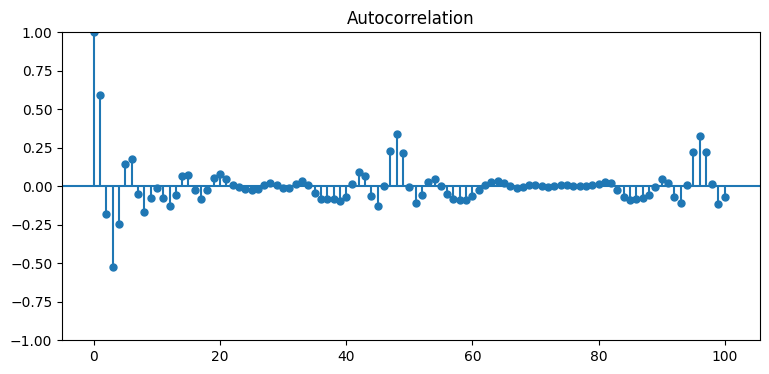

In [5]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

rcParams["figure.figsize"] = 9, 4
# ACF function up to 50 lags
fig = plot_acf(slice_audio[:,0], lags=100)

plt.show();

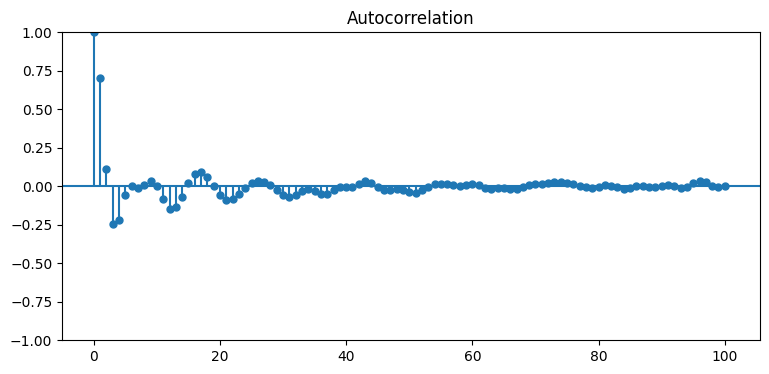

In [6]:
rcParams["figure.figsize"] = 9, 4
# ACF function up to 50 lags
fig = plot_acf(slice_audio[:,1], lags=100)

plt.show();